# Tâche 6

Ce notebook vise à déterminer les trois premiers pics du diffractogramme du cristal Ca2NCl pour un rayonnement incident CuK$\alpha$ de longueur d'onde $\lambda$ = 1.54060 Å (rayon 
X). Les indices hkl associés sont également indiqués.

In [10]:
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [11]:
mp_key = "laRpenx9s6Ae6IiAe8AHZRRyzI5fduqF"
mp_id = "mp-22936"

In [12]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)

# initilisation d'un objet XRDCalculator calibré sur la longueur d'onde 1.54060 Å. Par défaut XRDcalculator prend en compte un rayon CUK𝛼
xrd = XRDCalculator(1.54060)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Notions théoriques

Envoyé des rayons X sur le cristal fait apparaître des phénomènes d'interférences constructives ou destructives dans certaines directions. Les rayons X sont utilisés car leur longueur d'onde est de l'ordre de la longueur des distances interatomiques allant de 1 à 2 Å. En se servant du phénomène de diffraction, il devient possible de déterminer la position des atomes de la structure ou encore les symétries.  En d'autres termes, les rayons X rencontrent le cristal et réagissent à la rencontre des atomes de la structure cristalline par des phénomènes de diffraction qui créent entre eux des interférences destructives et constructives.$\\$ On définit un angle 2$\theta$ représentant l'angle entre la direction incidente et la direction de l'observation. En fonction de cet angle 2$\theta$, on va observer une certaine intensité si c'est une interférence constructive et une intensité nulle si c'est une interférence constructive. C'est cela qu'on observe sur un diffractogramme, en fonction de l'angle d'observation on observe une certaine intensité. Les pics représentent les angles où l'on observe une interference constructive.

In [13]:
'''
création de mod, object contenant les différents pics en renvoyant pour chaque pic un DiffractionPattern 
contenant l'angle 2θ, l'intensité, les indices hkl et leur multiplicité et la distance entre les plans
'''
mod = xrd.get_pattern(prim_struc)

# Extraction des informations pour le premier pic

In [14]:
print("Le premier pic a comme spécificités")
print("Les indices hkl et leur multiplicités sont :  ", mod.hkls[0])
print("L'intensité du pic vaut ",mod.y[0])  
print("L'angle 2θ d'observation est égal à ", mod.x[0],"°")
print("La distance interplan vaut",mod.d_hkls[0], 'Å')

Le premier pic a comme spécificités
Les indices hkl et leur multiplicités sont :   [{'hkl': (1, 1, 1), 'multiplicity': 2}]
L'intensité du pic vaut  2.7451063735150822
L'angle 2θ d'observation est égal à  13.455070504095689 °
La distance interplan vaut 6.575441774178105 Å


### Analyse 
L'intensité du rayon diffracté est de 2,74 et l'angle de diffraction est de 13,45°. Ce cristal possède 2 plans cristallins identiques dans le cristal alignés dans la direction (1, 1 ,1) et espacés de 6.575441774178105 Å.

# Extraction des informations pour le deuxième pic

In [15]:
print("Le deuxième pic a comme spécificités")
print("Les indices hkl et leur multiplicités sont: ", mod.hkls[1])
print("L'intensité du pic vaut ", mod.y[1])
print("L'angle 2θ d'observation est égal à", mod.x[1],"°")
print("La distance interplan vaut ",mod.d_hkls[1])

Le deuxième pic a comme spécificités
Les indices hkl et leur multiplicités sont:  [{'hkl': (2, 2, 2), 'multiplicity': 2}]
L'intensité du pic vaut  0.2748338385005748
L'angle 2θ d'observation est égal à 27.100261327025645 °
La distance interplan vaut  3.2877208870890526


### Analyse
 L'intensité du rayon diffracté est de 0.2748 et l'angle de diffraction  est de 27.1°. Ce cristal possède 2 plans cristallins identiques dans le cristal alignés dans la direction (2, 2 ,2) et espacés de 3.288 Å. 

# Extraction des informations pour le troisième pic

In [16]:
print("Le troisième pic a comme spécificités")
print("Les indices hkl et leur multiplicités sont: ", mod.hkls[2])
print("L'intensité du pic vaut",mod.y[2])   
print("L'angle 2θ d'observation est égal à ", mod.x[2],"°")
print("La distance interplan vaut = ",mod.d_hkls[2])

Le troisième pic a comme spécificités
Les indices hkl et leur multiplicités sont:  [{'hkl': (1, 0, 0), 'multiplicity': 6}]
L'intensité du pic vaut 11.671069184373787
L'angle 2θ d'observation est égal à  28.515315502644174 °
La distance interplan vaut =  3.1277048243584


### Analyse
L'intensité du rayon diffracté est de 11.67 et l'angle de diffraction est de 28.51°. Ce cristal possède 6 plans cristallins identiques dans le cristal alignés dans la direction (1, 0 ,0) et espacés de 3.13 Å.

# Plot du diffractogramme

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

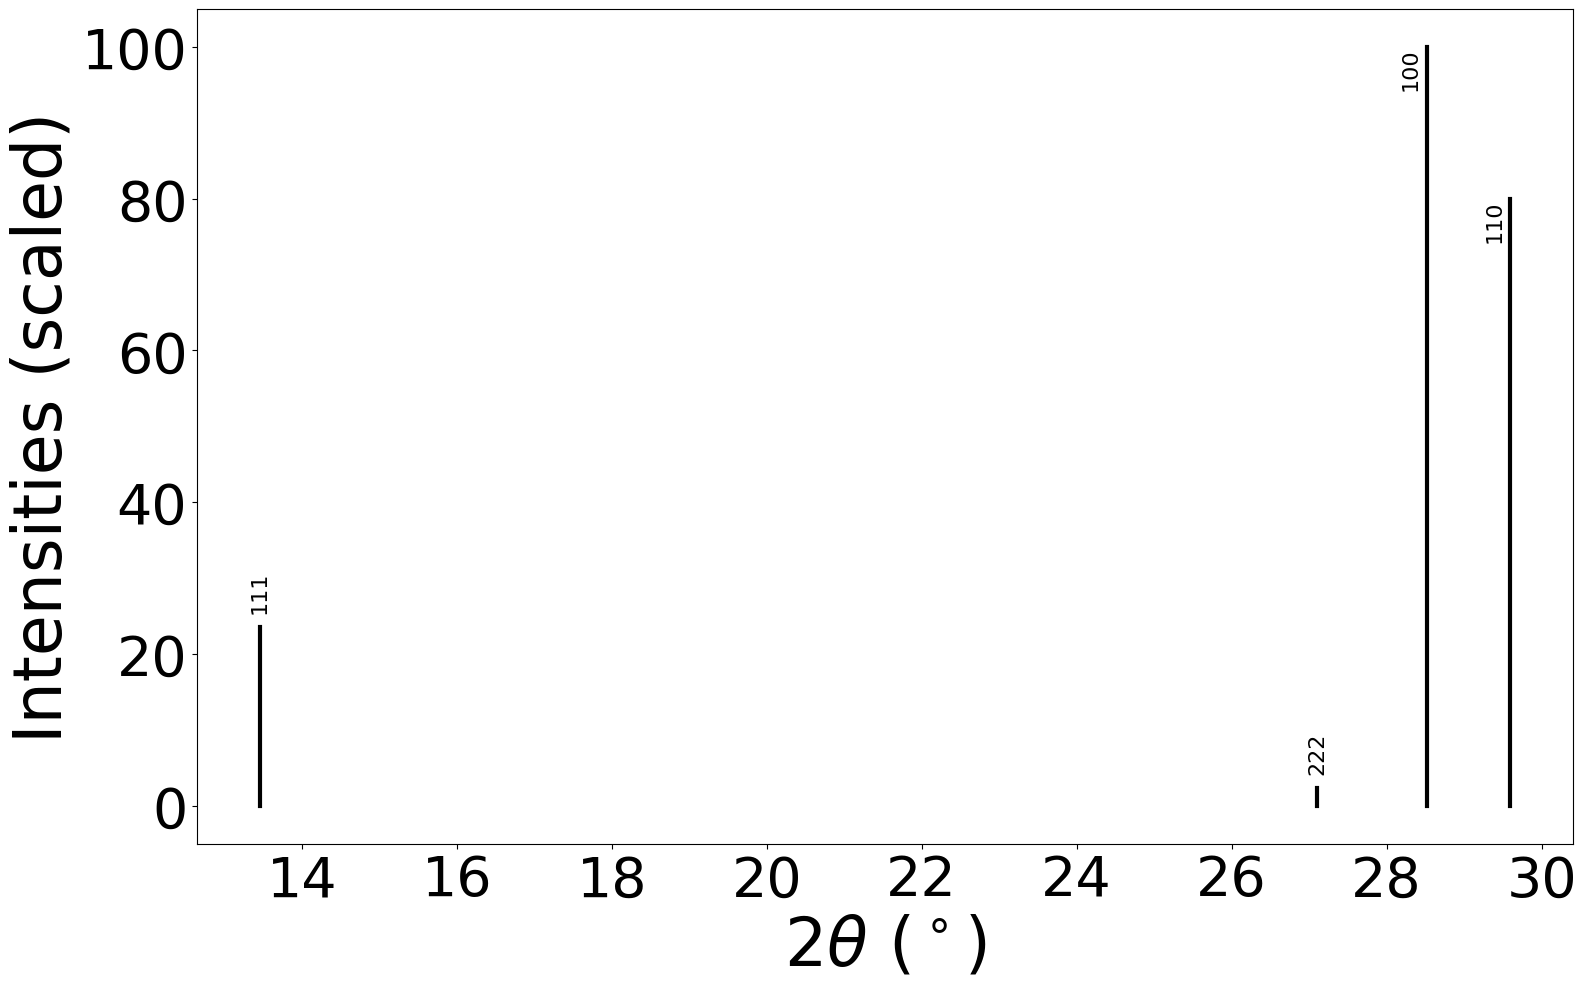

In [17]:
#fourni un plot du diffractogramme pour l'objet xrd initialisé plus haut
xrd.get_plot(prim_struc, two_theta_range=(0,30))

On peut confirmer ce qui a été dit plus haut en regardant ce plot du diffractogramme pour un angle allant de 0 à 30° qui comprend les 4 premiers pics. L'intensité des pics de diffraction dépend notamment du nombre de plan et c'est bien le pic 3 associé à une multiplicité des plans de 6 comparé à 2 pour les autres qui a la plus forte intensité. 